# Exercise Set 12: Peer effects 


In this Exercise Set 12 we will investigate peer effects data. 

## 12.1: roommate peer effects


<br>
<br>

We use a simlated dataset which will give results that provide conclusions similar to Sacerdote (2000). 

### Data structuring 

Our data set does not contain a network but has an implicit one associated. We assume there is an edge between all room mates. 

> **Ex. 12.1.1:** Create a column called `person_other` with identity of the other person in room.
>> *Hint:* You can get the unique people in the room by using `df.groupby('room').person.unique()`.

In [23]:
# [Answer to ex. 12.1.1 here]
import pandas as pd

data = pd.read_csv("peer_effects_room-Copy1.csv")

data.head()


,person,room,high_school_GPA,college_GPA
0,0,351,-1.715472,-1.285307
1,1,738,-0.530190,-0.031833
2,2,247,-0.589543,-0.203230
3,3,751,-1.303115,0.982488
4,4,698,0.156678,-0.371632


In [20]:
f = df.groupby('room').person.unique()
f.head()

room
0    [1603, 1757]
1     [466, 1649]
2     [816, 1929]
3     [481, 1719]
4    [1108, 1887]
Name: person, dtype: object

In [24]:
df = data.merge(data[['person','room']], on = 'room',)
df = df[df['person_x'] != df['person_y']] 
df.head()

,person_x,room,high_school_GPA,college_GPA,person_y
1,0,351,-1.715472,-1.285307,1645
2,1645,351,-0.818594,-0.434847,0
5,1,738,-0.530190,-0.031833,1039
6,1039,738,-0.493444,0.299729,1
9,2,247,-0.589543,-0.203230,944


<br>

> **Ex. 12.1.2:** Add information on the roommate GPA in high school and college.
>> *Hint:* This can be done merging on `person_other`.

In [25]:
# [Answer to ex. 12.1.2 here]
df_roommate = data[['person', 'high_school_GPA', 'college_GPA']].add_suffix('_y')
df = df.merge(df_roommate, on ='person_y')
df.head()

,person_x,room,high_school_GPA,college_GPA,person_y,high_school_GPA_y,college_GPA_y
0,0,351,-1.715472,-1.285307,1645,-0.818594,-0.434847
1,1645,351,-0.818594,-0.434847,0,-1.715472,-1.285307
2,1,738,-0.530190,-0.031833,1039,-0.493444,0.299729
3,1039,738,-0.493444,0.299729,1,-0.530190,-0.031833
4,2,247,-0.589543,-0.203230,944,1.281112,-0.479543


<br>
<br>

### Data exploration and randomization

We now have our final dataset and can begin investigating how the raw data looks. 

> **Ex. 12.1.3:** plot own GPA in high school vs college in a scatter plot.

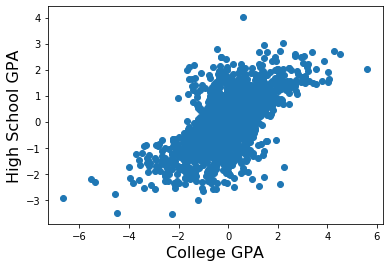

In [30]:
# [Answer to ex. 12.1.3 here]
import matplotlib.pylab as plt

plt.scatter(df['college_GPA'], df['high_school_GPA'])
plt.xlabel('College GPA', size = 16)
plt.ylabel('High School GPA', size = 16)
plt.show()

<br>
We want to check there is random assignment of roommates. 

> **Ex. 12.1.4:** Plot high school GPA vs roommate's high school GPA. Comment on the output. Run a regresion of high school GPA on roommate's high school GPA to formally check random assignment.
>
>> *Hint*: To run regressions in python, you can use the `statsmodels` package. Look up it's documentation and use the `.formula` api to estimate your model. To see a summary of a fitted model you can call `.summary()` on the object. 
>
>> *Hint:* Under random assignment we would expect there to be no relation between the high school GPA's of roommates. Why is this? 

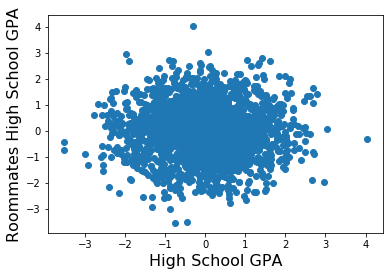

In [27]:
# [Answer to ex. 12.1.4 here]

plt.scatter(df['high_school_GPA'], df['high_school_GPA_y'])
plt.xlabel('High School GPA', size = 16)
plt.ylabel('Roommates High School GPA', size = 16)
plt.show()

The distribution looks random - there is no visible trend in assigning per GPA. 

In [33]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas.util.testing as tm


In [35]:
reg = smf.ols(formula='high_school_GPA ~ high_school_GPA_y', data=df)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        high_school_GPA   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07263
Date:                Fri, 22 May 2020   Prob (F-statistic):              0.788
Time:                        20:43:35   Log-Likelihood:                -2883.6
No. Observations:                2000   AIC:                             5771.
Df Residuals:                    1998   BIC:                             5782.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0284      0.02

It is confirmed there is no effect

<br>
<br>

## Roommate effect

Having checked the data we move on to analyzing peer effects. We begin with analyzing **exogenous** peer effects. I.e. peer effects that are related to the ex ante characteristics of the roommate.

> **Ex. 12.1.5:** Plot own GPA in college vs. roommate GPA in high school. Comment on the output. Test whether there is an impact using a regresion of college school GPA on high school GPA for the person itself and its roommate.

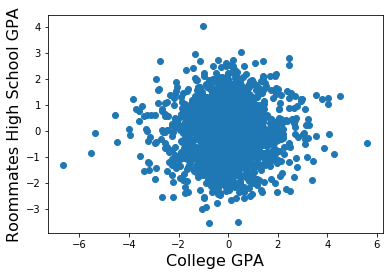

In [36]:
# [Answer to ex. 12.1.5 here]
plt.scatter(df['college_GPA'], df['high_school_GPA_y'])
plt.xlabel('College GPA', size = 16)
plt.ylabel('Roommates High School GPA', size = 16)
plt.show()

There appears to be no effect

In [41]:
reg = smf.ols(formula='college_GPA ~ high_school_GPA_y', data=df)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            college_GPA   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.584
Date:                Fri, 22 May 2020   Prob (F-statistic):              0.208
Time:                        21:00:50   Log-Likelihood:                -3099.5
No. Observations:                2000   AIC:                             6203.
Df Residuals:                    1998   BIC:                             6214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0427      0.02

It is confirmed that there is no effect.

We now move on to analyze **endogenous** peer effects.

> **Ex. 12.1.6:** Test whether there is an association between own college GPA and roommates. Do this by running a regresion of college school GPA on high school GPA for the person itself and its roommate. Comment on the output.

In [40]:
reg = smf.ols(formula='college_GPA ~ high_school_GPA + high_school_GPA_y + college_GPA_y', data=df)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            college_GPA   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     453.7
Date:                Fri, 22 May 2020   Prob (F-statistic):          1.02e-224
Time:                        21:00:34   Log-Likelihood:                -2580.3
No. Observations:                2000   AIC:                             5169.
Df Residuals:                    1996   BIC:                             5191.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0209      0.02

As expected, own High School GPA has an effect on own College GPA. Furthermore, roommates College GPA has a measureable significant effect on own college GPA. More than 10 times less than high school GPA, but still. 

<br>
<br>

# 12.2 Peer effects in Danish classrooms

Read the [report by Kraka on peer effects in Danish schools](http://kraka.dk/sites/default/files/public/baggrundsnotat_klassekammerateffekter_0.pdf) from 2019. If you do not speak Danish talk to your group about the content.
> **Ex. 12.2.1:** Explain the identification strategy in words.

The article how there is a selection bias, as kids with ressource strong parents, that often themselfs are end up strong students, often live in the same neighbourhoods and end up on the same schools. Opposite "weak" students end up on the same schools. The article deals with this by estimating effects based on the variation in the mix of students from different class-years.  

> **Ex. 12.2.2:** Are there any shortcomings of the identification strategy? What does the seminal paper [Hoxby (2000)](https://www.nber.org/papers/w78612.pdf) test for?

The identification strategy only fix a little bit of the problem as the variation between years is assumed to be small as most of the differences are connected to the neighborhood. 
I can not acess the paper in the link. In the Hoxby 200 paper i can find Hoxby tests for class size.


> **Ex. 12.2.3:** Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.

It is hard to seperate peer-effects from effects caused by social class. The ideal solution would be to do a large-scale, long-term experiment, but since this is not possible it is all about least sucky second best. Maybe there are "natural experiments" where schools are closed down and students moved to new schools that could be interesting to look at. How they get on compared to the students from the same neighour hood that graduated from the same school before closeing. But again there can be 1000 other effects influencing and a new school does not nessicarily mean a new mix of social classes.